<center><h1>Practice Project: Data Exploration</h1></center>

## Importing Necessary Libraries for Data Exploration

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Apply the default seaborn theme, scaling, and color palette
from seaborn import axes_style
from matplotlib.pyplot import *
from scipy import stats
import pandas as pd
import numpy as np
import scipy

import warnings
warnings.filterwarnings("ignore")

## About Dataset
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

### Attributes

* $price =$ price in US dollars (\\$326--\\$18,823)
* $carat =$ weight of the diamond (0.2--5.01)
* $cut =$ quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* $color =$ diamond colour, from J (worst) to D (best)
* $clarity =$ a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* $x =$ length in mm (0--10.74)
* $y =$ width in mm (0--58.9)
* $z =$ depth in mm (0--31.8)
* $depth =$ total depth percentage = $z / mean(x, y) = 2 * z / (x + y) (43--79)$
* $table =$ width of top of diamond relative to widest point (43--95)

## Load the Dataset

In [4]:
diamonds = sns.load_dataset("diamonds")  # Loaded in a Pandas DataFrame
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 1.0 Variable Identification

In [0]:
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [0]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## 2.0 Univariate Analysis

### 2.1 For continuous variables: mean, median, mode, min, max, histograms (distribution), and boxplots

In [0]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [0]:
diamonds.describe(include=['object'], exclude=['float64'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [0]:
figure_width = 12
figure_height = 6

cut and carat variables barplot


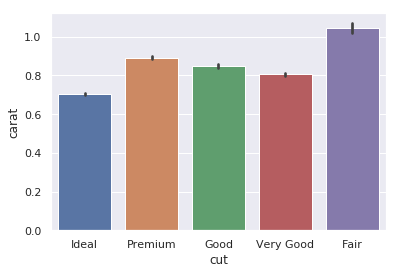

In [0]:
print('cut and carat variables barplot')
cut_carat_barplot = sns.barplot(x = 'cut', y = 'carat', data = diamonds)

table and clarity variables boxplot


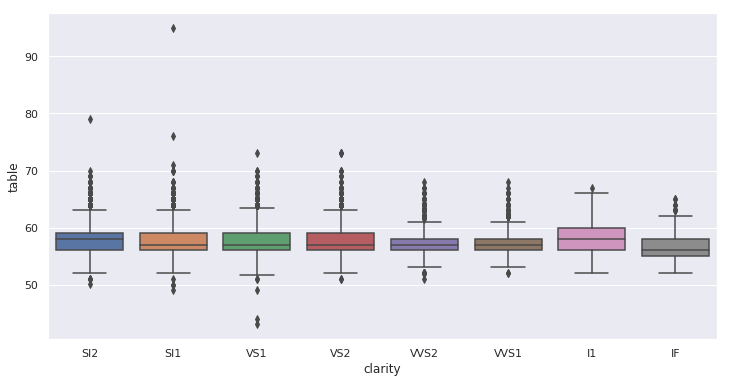

In [0]:
print('table and clarity variables boxplot')
figure(figsize = (figure_width, figure_height))
table_clarity_boxplot =  sns.boxplot(x = 'clarity', y = 'table', data = diamonds)

### 2.2 For categorical variables: frequency table, count plot

Frequency table of catagorical variables 

In [0]:
cut_frequency = diamonds['cut'].value_counts()
print('Cut variable frequency table: ', cut_frequency)

color_frequency = diamonds['color'].value_counts()
print('color variable frequency table: ', color_frequency)

clarity_frequency = diamonds['clarity'].value_counts()
print('clarity variable frequency table: ', clarity_frequency)

Cut variable frequency table:  Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
color variable frequency table:  G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
clarity variable frequency table:  SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


Count plot of catagorical variables

cut variable count plot


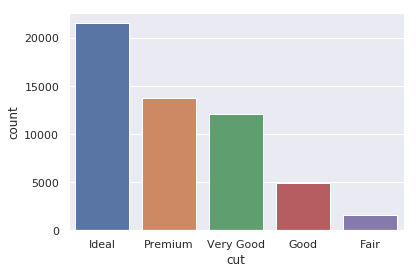

In [0]:
print('cut variable count plot')
descending_order = diamonds['cut'].value_counts().sort_values(ascending = False).index
cut_count_plot = sns.countplot(x = 'cut', order = descending_order, data = diamonds)

color variable count plot


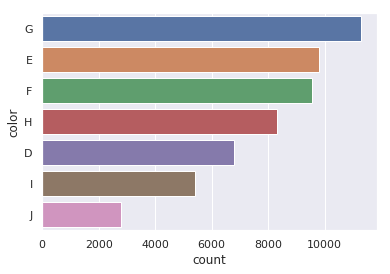

In [0]:
print('color variable count plot')
descending_order = diamonds['color'].value_counts().sort_values(ascending = False).index
cut_count_plot = sns.countplot(y = 'color', order = descending_order, data = diamonds)

clarity variable count plot


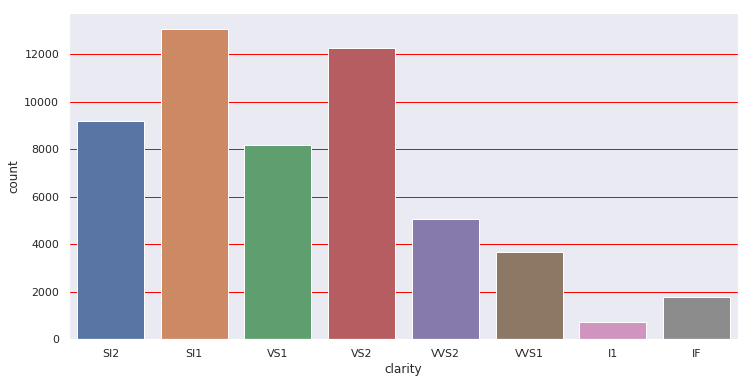

In [0]:
print('clarity variable count plot')
with axes_style({'grid.color': "red"}):
    fig = figure(figsize=(figure_width,figure_height))
    ax = sns.countplot(x= 'clarity', data = diamonds)



## 3.0 Bi-variate Analysis

### 3.1 Continuous \& Continuous: scatter plots

carat and price variables scatter plot


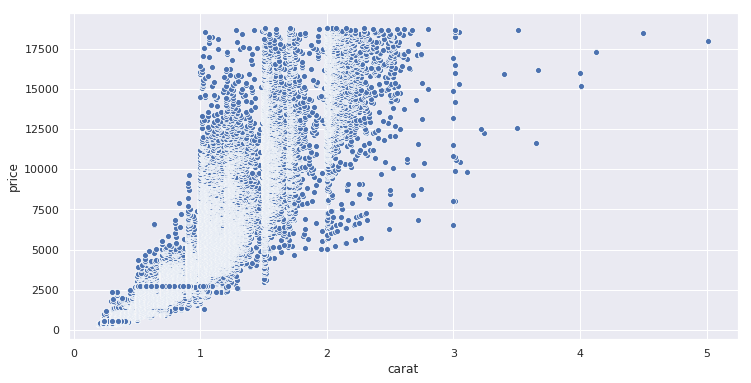

In [0]:
print('carat and price variables scatter plot')
figure(figsize = (figure_width, figure_height))
carat_price_scatter_plot =  sns.scatterplot(x = 'carat', y = 'price', data = diamonds)

carat and depth variables scatter plot


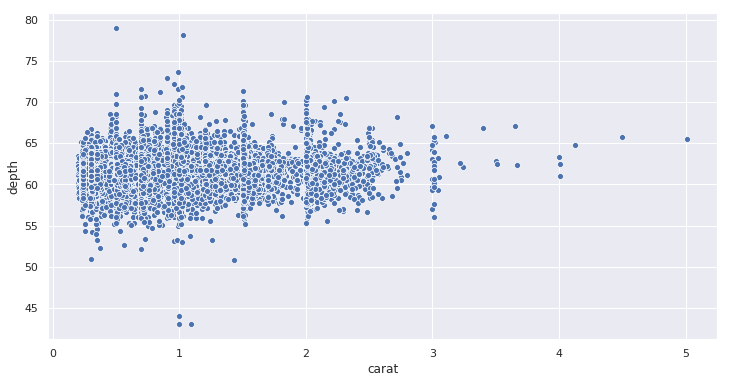

In [0]:
print('carat and depth variables scatter plot')
figure(figsize = (figure_width, figure_height))
carat_depth_scatter_plot =  sns.scatterplot(x = 'carat', y = 'depth', data = diamonds)

carat and price variables with cut scatter plot


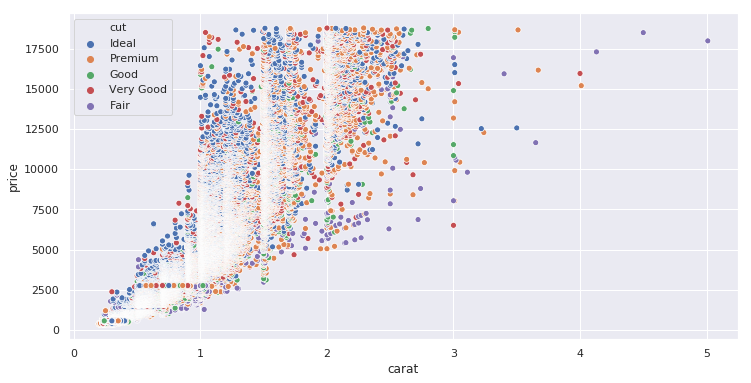

In [0]:
print('carat and price variables with cut scatter plot')
figure(figsize = (figure_width, figure_height))
carat_price_scatter_plot =  sns.scatterplot(x = 'carat', y = 'price', hue = 'cut', data = diamonds)

### 3.2 Categorical & Categorical: stacked column chart

cut and carat variables stacked column chart


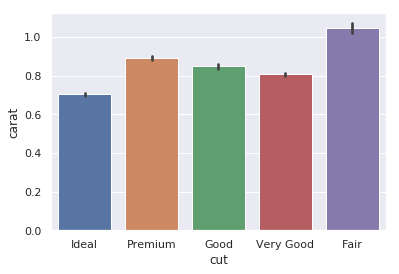

In [0]:
print('cut and carat variables stacked column chart')
cut_carat_stacked_column_chart = sns.barplot(x = 'cut', y = 'carat', data = diamonds)

cut and price variables over color variable stacked column chart


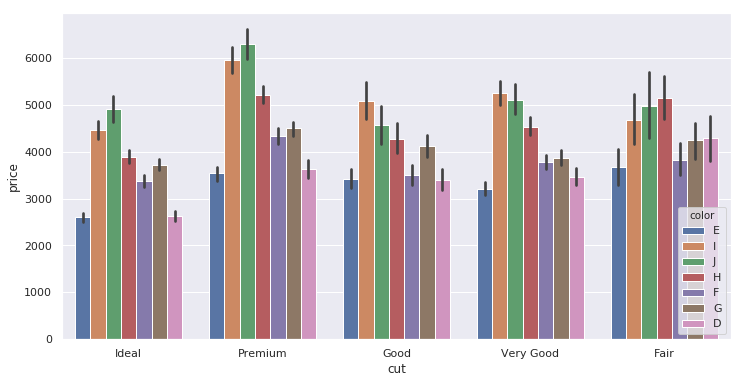

In [0]:
print('cut and price variables over color variable stacked column chart')
figure(figsize = (figure_width, figure_height))
cut_price_stacked_column_chart = sns.barplot(x = 'cut', y = 'price', hue = 'color', data = diamonds)

### 3.3 Categorical & Continuous: boxplots

cut and price variables boxplot


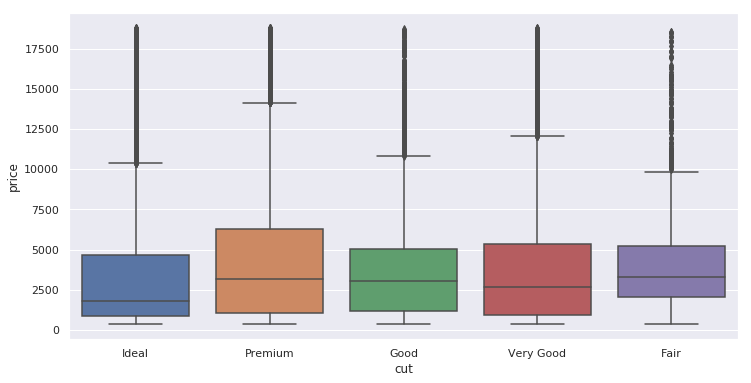

In [0]:
print('cut and price variables boxplot')
figure(figsize = (figure_width, figure_height))
cut_price_boxplot = sns.boxplot(x = 'cut', y = 'price',data = diamonds)

cut and price variables over color variable boxplot


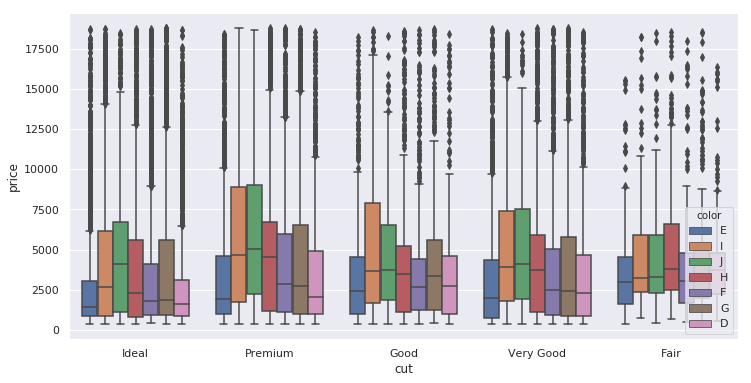

In [0]:
print('cut and price variables over color variable boxplot')
figure(figsize = (figure_width, figure_height))
cut_price_boxplot = sns.boxplot(x = 'cut', y = 'price', hue = 'color',data = diamonds)

cut and price variables boxplot


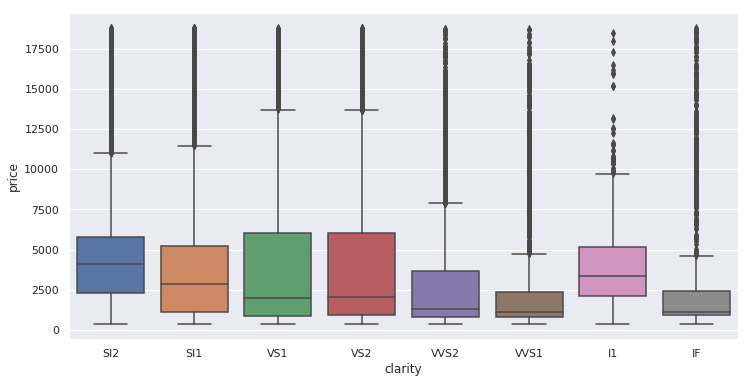

In [0]:
print('cut and price variables boxplot')
figure(figsize = (figure_width, figure_height))
cut_price_boxplot = sns.boxplot(x = 'clarity', y = 'price', data = diamonds)


clarity and carat variables boxplot


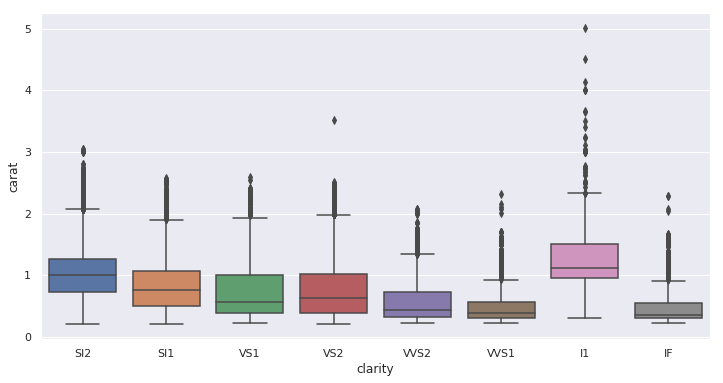

In [0]:
print('clarity and carat variables boxplot')
figure(figsize = (figure_width, figure_height))
clarity_carat_boxplot = sns.boxplot(x = 'clarity', y = 'carat', data = diamonds)

### 3.4 Correlation Analysis: correlation matrix

In [0]:
correlation_matrix = diamonds.corr()
correlation_matrix

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


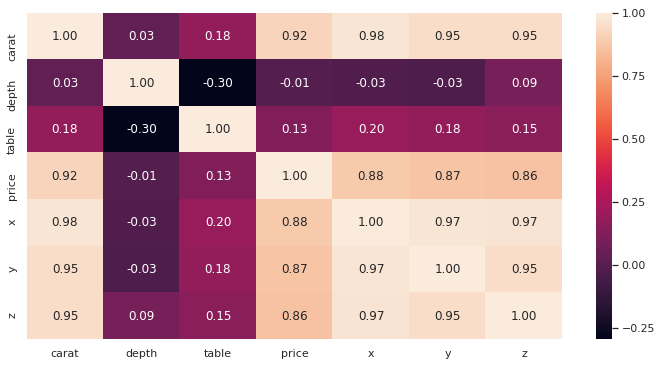

In [0]:
plt.figure(figsize=(figure_width,figure_height))
plot = sns.heatmap(correlation_matrix, annot=True, fmt=".2f")

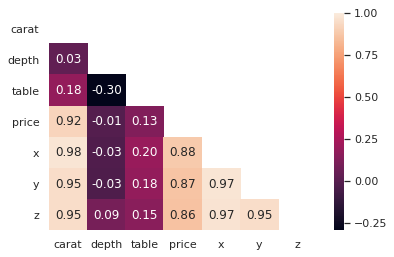

In [0]:
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    plot = sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f")

## 4.0 Missing Value Analysis

In [0]:
missing_value = diamonds.isnull().values.any()
if missing_value == False:
  print('The Dataset does not contain any null value')
else:
    print('Missing value found')

The Dataset does not contain any null value


In [0]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## 5.0 Outlier Analysis

price variable outlier analysis by Boxplot


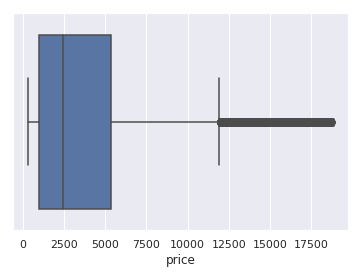

In [0]:
print('price variable outlier analysis by Boxplot')
price_boxplot = sns.boxplot(x = 'price', data = diamonds)

cut variable outlier analysis by Boxplot


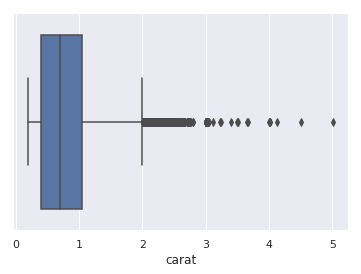

In [0]:
print('cut variable outlier analysis by Boxplot')
cut_boxplot = sns.boxplot(x = 'carat', data = diamonds)

depth variable outlier analysis by Boxplot


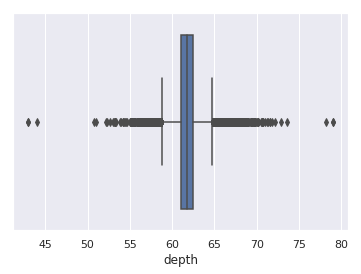

In [0]:
print('depth variable outlier analysis by Boxplot')
depth_boxplot = sns.boxplot(x = 'depth', data = diamonds)

depth variable outlier analysis by Boxplot


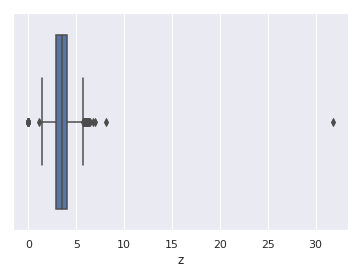

In [13]:
print('z variable outlier analysis by Boxplot')
z_boxplot = sns.boxplot(x = 'z', data = diamonds)

Calculating the z score for outlier analysis 

In [0]:
z = np.abs(stats.zscore(diamonds['depth']))
if np.where(z > 3):
  print('outliers have')
else:
  print('NOT')

outliers have


## 6.0 Class Imbalance Analysis

**Note:** This is not a classification problem. Here the target variable is $price$. You can just explore the frequency table of some categorical variables.

In [0]:
diamonds["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64